In [686]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import seaborn as sns
import matplotlib.gridspec as gridspec
import copy as cp

In [687]:
df = pd.read_csv("job-market.csv")
df.head()

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
1,37404337.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
2,37404356.0,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0.0,30.0,NaN
3,37404330.0,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0.0,30.0,NaN
4,37404308.0,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0.0,30.0,NaN


In [688]:
df.info()
# drop all rows with NaN values in every column
df.dropna(how='all', inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40789 entries, 0 to 40788
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 10099 non-null  float64
 1   Title              10099 non-null  object 
 2   Company            9483 non-null   object 
 3   Date               10099 non-null  object 
 4   Location           10099 non-null  object 
 5   Area               6392 non-null   object 
 6   Classification     10099 non-null  object 
 7   SubClassification  10099 non-null  object 
 8   Requirement        10099 non-null  object 
 9   FullDescription    9843 non-null   object 
 10  LowestSalary       10099 non-null  float64
 11  HighestSalary      10099 non-null  float64
 12  JobType            9852 non-null   object 
dtypes: float64(3), object(10)
memory usage: 4.0+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10099 entries, 0 to 10098
Data columns (total 13 columns):
 #   Colu

In [689]:
#Find the number of NaN values in FullDescription
num_nan_values = df['FullDescription'].isnull().sum()
#find the number of NaN values in each of the Columns
num_nun_values_ID = df['Id'].isnull().sum()
num_nun_values_Title = df['Title'].isnull().sum()
num_nan_values_Company = df['Company'].isnull().sum()
num_nan_values_Date = df['Date'].isnull().sum()
num_nan_values_Location = df['Location'].isnull().sum()
num_nan_values_Area = df['Area'].isnull().sum()
num_nan_values_Classification = df['Classification'].isnull().sum()
num_nan_values_SubClassification = df['SubClassification'].isnull().sum()
num_nan_values_Requirment = df['Requirement'].isnull().sum()
num_nan_values_LowestSalary = df['LowestSalary'].isnull().sum()
num_nan_values_HighestSalary = df['HighestSalary'].isnull().sum()
#print all the counts of NaN values for each Column
print("Number of NaN values in Id:", num_nun_values_ID)
print("Number of NaN values in Title:", num_nun_values_Title)
print("Number of NaN values in Company:", num_nan_values_Company)
print("Number of NaN values in Date:", num_nan_values_Date)
print("Number of NaN values in Location:", num_nan_values_Location)
print("Number of NaN values in Area:", num_nan_values_Area)
print("Number of NaN values in Classification:", num_nan_values_Classification)
print("Number of NaN values in SubClassification:", num_nan_values_SubClassification)
print("Number of NaN values in Requirement:", num_nan_values_Requirment)
print("Number of NaN values in FullDescription:", num_nan_values)
print("Number of NaN values in LowestSalary:", num_nan_values_LowestSalary)
print("Number of NaN values in HighestSalary:", num_nan_values_HighestSalary)


Number of NaN values in Id: 0
Number of NaN values in Title: 0
Number of NaN values in Company: 616
Number of NaN values in Date: 0
Number of NaN values in Location: 0
Number of NaN values in Area: 3707
Number of NaN values in Classification: 0
Number of NaN values in SubClassification: 0
Number of NaN values in Requirement: 0
Number of NaN values in FullDescription: 256
Number of NaN values in LowestSalary: 0
Number of NaN values in HighestSalary: 0


The Full Description, Company and Area columns have the most NaN values.
All other columns have no NaN values.
The Full Description and Area Columns may be dropped as they contain the data of least interest.

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348.0,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
1,37404337.0,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
2,37404356.0,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0.0,30.0,NaN
3,37404330.0,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07 00:00:00+00:00,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0.0,30.0,NaN
4,37404308.0,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07 00:00:00+00:00,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0.0,30.0,NaN


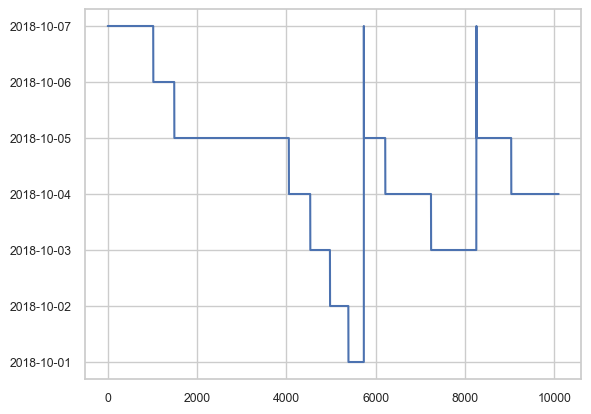

In [690]:
#explore data types in Date column
df['Date'].head()
#normalise the data in Date column
df['Date'] = pd.to_datetime(df['Date'])
#visualise Date column in plot
df['Date'].plot()
df.head()


In [691]:
#find all types of classifications
df['Classification'].unique()
df['SubClassification'].unique()
df['Location'].unique()
df['Area'].unique()
df['Company'].unique()
df['Title'].unique()
df['Requirement'].unique()
df['LowestSalary'].unique()
df['HighestSalary'].unique()
#print all the unique values in Classification column
print("Unique values in Classification column:", df['Classification'].unique())
print("Unique values in SubClassification column:", df['SubClassification'].unique())
print("Unique values in Location column:", df['Location'].unique())
print("Unique values in Area column:", df['Area'].unique())
print("Unique values in Company column:", df['Company'].unique())
print("Unique values in Title column:", df['Title'].unique())
print("Unique values in Requirement column:", df['Requirement'].unique())
print("Unique values in LowestSalary column:", df['LowestSalary'].unique())
print("Unique values in HighestSalary column:", df['HighestSalary'].unique())

Unique values in Classification column: ['Retail & Consumer Products' 'Call Centre & Customer Service'
 'Hospitality & Tourism' 'Banking & Financial Services'
 'Manufacturing, Transport & Logistics' 'Sales'
 'Administration & Office Support' 'Trades & Services' 'Accounting'
 'Real Estate & Property' 'Healthcare & Medical'
 'Marketing & Communications' 'Government & Defence'
 'Information & Communication Technology' 'Education & Training'
 'Community Services & Development' 'Mining, Resources & Energy'
 'Human Resources & Recruitment' 'Insurance & Superannuation'
 'Engineering' 'CEO & General Management' 'Design & Architecture' 'Legal'
 'Construction' 'Sport & Recreation' 'Science & Technology'
 'Advertising, Arts & Media' 'Farming, Animals & Conservation'
 'Self Employment' 'Consulting & Strategy']
Unique values in SubClassification column: ['Retail Assistants' 'Sales - Inbound' 'Customer Service - Call Centre'
 'Waiting Staff' 'Sales - Outbound' 'Kitchen & Sandwich Hands'
 'Banking - 

In [692]:
#Print value counts for each unique value in each column.
print("Value counts for Classification column:", df['Classification'].value_counts())


Value counts for Classification column: Hospitality & Tourism                     1585
Trades & Services                         1225
Manufacturing, Transport & Logistics       990
Retail & Consumer Products                 896
Administration & Office Support            746
Healthcare & Medical                       622
Information & Communication Technology     411
Education & Training                       401
Sales                                      389
Accounting                                 378
Call Centre & Customer Service             342
Construction                               265
Community Services & Development           258
Real Estate & Property                     228
Government & Defence                       203
Mining, Resources & Energy                 176
Banking & Financial Services               153
Marketing & Communications                 139
Human Resources & Recruitment              138
Engineering                                126
Legal               

In [693]:
print("Value counts for SubClassification column:", df['SubClassification'].value_counts())

Value counts for SubClassification column: Other                                  546
Retail Assistants                      487
Chefs/Cooks                            474
Warehousing, Storage & Distribution    350
Administrative Assistants              343
                                      ... 
Nursing - Paediatric & PICU              1
Insurance & Superannuation Law           1
Banking & Finance Law                    1
Industrial Engineering                   1
Photography                              1
Name: SubClassification, Length: 304, dtype: int64


In [694]:
print("Value counts for Location column:", df['Location'].value_counts())

Value counts for Location column: Sydney                                  2784
Melbourne                               2481
Brisbane                                1119
Perth                                    677
Adelaide                                 390
                                        ... 
Fleurieu Peninsula & Kangaroo Island       6
Tumut, Snowy & Monaro                      4
Somerset & Lockyer                         4
Central & South East TAS                   3
Coober Pedy & Outback SA                   1
Name: Location, Length: 65, dtype: int64


In [695]:
print("Value counts for Location column:", df['Location'].value_counts())

Value counts for Location column: Sydney                                  2784
Melbourne                               2481
Brisbane                                1119
Perth                                    677
Adelaide                                 390
                                        ... 
Fleurieu Peninsula & Kangaroo Island       6
Tumut, Snowy & Monaro                      4
Somerset & Lockyer                         4
Central & South East TAS                   3
Coober Pedy & Outback SA                   1
Name: Location, Length: 65, dtype: int64


In [696]:
print("Value counts for Area column:", df['Area'].value_counts())

Value counts for Area column: CBD & Inner Suburbs                    1456
CBD, Inner West & Eastern Suburbs      1141
Bayside & South Eastern Suburbs         485
Parramatta & Western Suburbs            462
Eastern Suburbs                         429
Northern Suburbs                        422
North Shore & Northern Beaches          347
Western Suburbs                         292
CBD, Inner & Western Suburbs            250
South West & M5 Corridor                227
Southern Suburbs & Sutherland Shire     153
Southern Suburbs & Logan                142
North West & Hills District             126
Fremantle & Southern Suburbs            109
Northern Suburbs & Joondalup            105
Ryde & Macquarie Park                    96
Western Suburbs & Ipswich                82
Bayside & Eastern Suburbs                47
Rockingham & Kwinana                     21
Name: Area, dtype: int64


In [697]:
print("Value counts for Company column:", df['Company'].value_counts())

Value counts for Company column: Jora Local                        764
Design & Build                     86
Programmed Skilled Workforce       67
HOBAN Recruitment                  44
Coles                              44
                                 ... 
Bowls Australia                     1
Courage Health & Fitness            1
Echo Group Corporation Pty Ltd      1
Zenith Pacific                      1
Youthcare                           1
Name: Company, Length: 4326, dtype: int64


In [698]:
print("Value counts for Title column:", df['Title'].value_counts())
#print number of unique values in title
print("Number of unique values in Title column:", df['Title'].nunique())


Value counts for Title column: Administration Assistant                               36
Receptionist                                           30
Sales Consultant                                       24
Storeperson                                            22
Customer Service Officer                               22
                                                       ..
Rodd & Gunn Store Manager, Eastland                     1
Customer Service Manager Aust & NZ - Rural Industry     1
HIAB TRUCK DRIVER                                       1
Dispatch Delivery Manager (Transport)                   1
INTERNATIONAL WHOLESALE TRAVEL CONSULTANT               1
Name: Title, Length: 8285, dtype: int64
Number of unique values in Title column: 8285


In [699]:
print("Value counts for Requirement column:", df['Requirement'].value_counts())


Value counts for Requirement column: Whether they’re racing to fill shelves or scanning through customers, our Retail Assistants can do everything and anything.                               23
Do you love to shop? Do you love to tell others about your shopping experiences? Are you looking for extra income?                                        21
Seeking dynamic, customer service driven brand ambassadors to support our retail team during the Christmas Season trade. Multiple roles available!        16
Seeking an entry level position with a well established company? ProForce specialise in placing graduates into corporate roles to launch their careers    14
Work in one of the most amazing parts of the country!                                                                                                     10
                                                                                                                                                          ..
Weekend work for an e

In [700]:
print("Value counts for LowestSalary column:", df['LowestSalary'].value_counts())


Value counts for LowestSalary column: 0.0     3894
40.0    2519
50.0    1844
30.0    1842
Name: LowestSalary, dtype: int64


In [701]:
print("Value counts for HighestSalary column:", df['HighestSalary'].value_counts())

Value counts for HighestSalary column: 30.0    3894
50.0    2519
60.0    1844
40.0    1842
Name: HighestSalary, dtype: int64


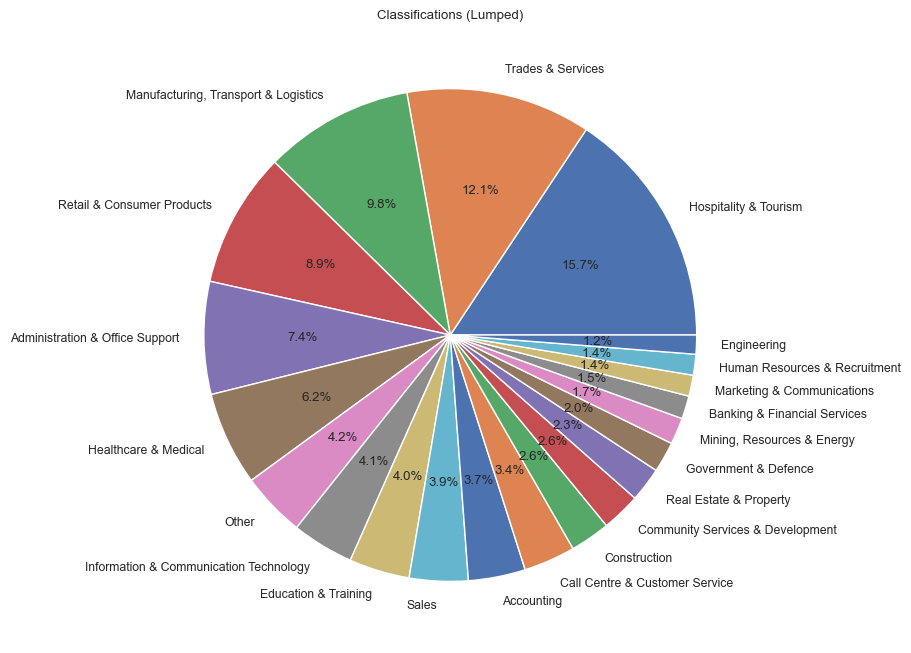

In [702]:
# Calculate the percentage of each classification
classification_counts = df['Classification'].value_counts()
classification_percentages = classification_counts / classification_counts.sum()

# Set the threshold for lumping small classifications
threshold = 0.01  # Set the threshold to 1% (0.01)

# Convert the classification percentages to a DataFrame
classification_percentages_df = pd.DataFrame(classification_percentages)

# Create a new column 'ClassificationLumped' based on the threshold
df['ClassificationLumped'] = df['Classification'].copy()
df.loc[df['Classification'].isin(classification_percentages_df[classification_percentages_df['Classification'] < threshold].index), 'ClassificationLumped'] = 'Other'

# Plot the pie chart
plt.figure(figsize=(8, 8))
df['ClassificationLumped'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Classifications (Lumped)')
plt.ylabel('')
plt.show()



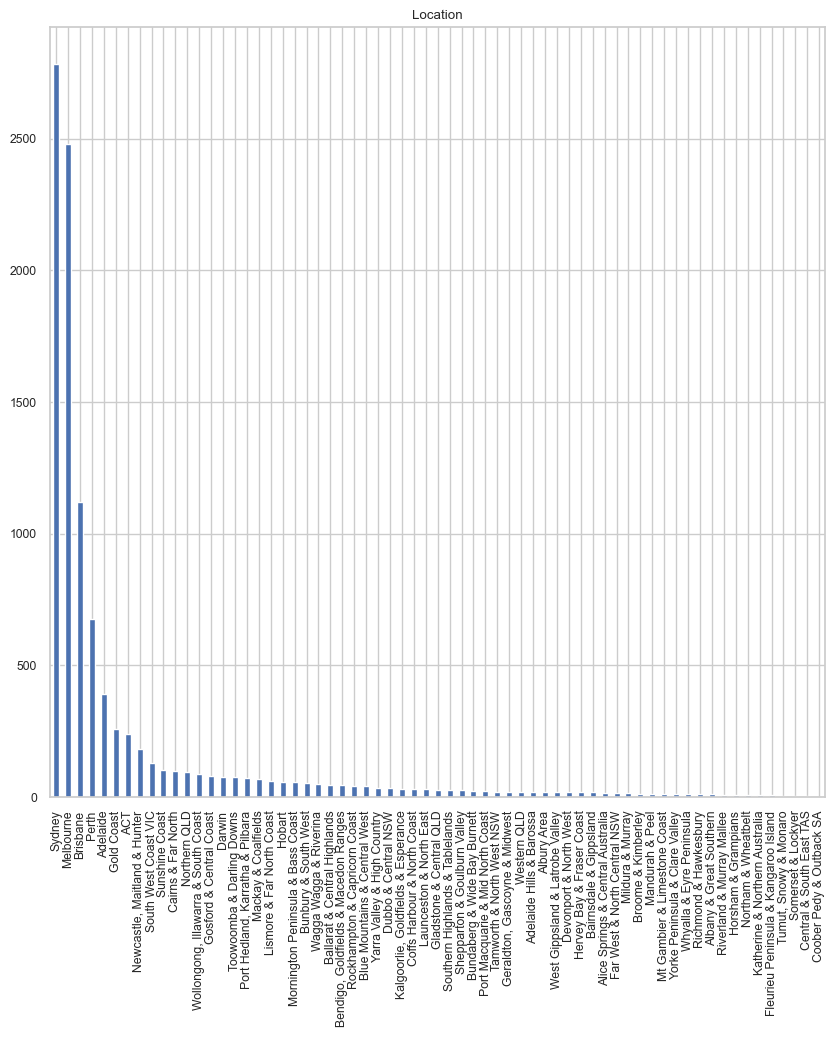

In [703]:
#plot and display a chart for location column
df['Location'].value_counts().plot(kind='bar', figsize=(10,10))
plt.title("Location")
plt.show()

This is a function which plots bar of pie charts. <br>
Parameters:<br>
df - data frame<br>
category - the parent category<br>
subcategory - the subcategory you want to look at a slice from<br>
color_pallete - a seaborn color pallete for the plot<br>

In [704]:
def split_label(label, max_length):
    words = label.split(' ')
    lines = []
    current_line = ''
    for word in words:
        if len(current_line + ' ' + word) <= max_length:
            current_line += ' ' + word
        else:
            lines.append(current_line)
            current_line = word
    lines.append(current_line)  # Don't forget the last line
    return '\n'.join(lines)

def plot_bar_of_pie(df, category, slice, subcategory, color_palette):
    # Define the figure
    fig = plt.figure(figsize=(12, 8))

    # Define the grid
    gs = gridspec.GridSpec(2, 2, height_ratios=[3, 1]) 

    ax1 = plt.subplot(gs[:, 0])  # This makes the pie chart take up the left column
    ax2 = plt.subplot(gs[:, 1])  # This makes the bar chart take up the top row of the right column
    fig.subplots_adjust(wspace=0)
    # Define color palette
    colors = sns.color_palette(color_palette, 8)
    
    # Pie chart parameters
    overallRatios = df[category].value_counts(normalize=True).values.tolist()
    labels = df[category].value_counts(normalize=True).index.tolist()

    slice_index = labels.index(slice)  # Find the index of the slice

    explode = [0] * len(overallRatios)
    explode[slice_index] = 0.1  # Use slice_index to set the exploded slice

    # Only label the exploded slice
    labels = [split_label(l, 23) if i == slice_index else '' for i, l in enumerate(labels)]

    # Calculate the cumulative sums of the ratios (in degrees) up to each slice
    cumulative_ratios = np.cumsum(np.array(overallRatios) * 360)

    # The starting angle for the exploded slice is then 360 minus the cumulative sum up to that slice
    start_angle = 360 - cumulative_ratios[slice_index - 1] if slice_index > 0 else 0

    # Subtract half of the slice's angle from the starting angle
    start_angle -= (overallRatios[slice_index] * 360) / 2

    # Plot the pie chart with the new start angle
    wedges, *_ = ax1.pie(overallRatios, autopct=None, startangle=start_angle,
                        labels=labels, explode=explode, colors=colors)

    # Bar chart parameters
    subClassificationRatios = df[df[category] == slice][subcategory].value_counts(normalize=True).values.tolist()
    subClassificationLabels = df[df[category] == slice][subcategory].value_counts(normalize=True).index.tolist()
    bottom = 1
    width = .2
    
    n = len(subClassificationRatios)
    alpha_increment = 0.9 / n
    
    # Adding from the top matches the legend.
    for j, (height, label) in enumerate(reversed([*zip(subClassificationRatios, subClassificationLabels)])):
        bottom -= height
        color = colors[j % len(colors)]
        bc = ax2.bar(0, height, width, bottom=bottom, color=color, label=label, alpha=0.1 + alpha_increment * j)
        # Check if the height is >= 1%. If not, don't label it.
        if height >= 0.01:
            ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center', color='black')
    
    ax2.legend()
    ax2.axis('off')
    ax2.set_xlim(-2.5 * width, 2.5 * width)
    ax2.legend(bbox_to_anchor=(.65, 0.8))
    
    # connect pie and bar
    slice_wedge = wedges[slice_index]  # Get the wedge at slice_index
    theta1, theta2 = slice_wedge.theta1, slice_wedge.theta2  # Use slice_wedge to get theta1 and theta2
    center, r = slice_wedge.center, slice_wedge.r  # Use slice_wedge to get center and r

    # draw top connecting line
    x = r * np.cos(np.pi / 180 * theta2) + center[0]
    y = r * np.sin(np.pi / 180 * theta2) + center[1]
    con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                        xyB=(x, y), coordsB=ax1.transData)
    con.set_color([0, 0, 0])
    con.set_linewidth(1)
    ax2.add_artist(con)

    # draw bottom connecting line
    x = r * np.cos(np.pi / 180 * theta1) + center[0]
    y = r * np.sin(np.pi / 180 * theta1) + center[1]
    con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                        xyB=(x, y), coordsB=ax1.transData)
    con.set_color([0, 0, 0])
    ax2.add_artist(con)
    con.set_linewidth(1)

    
    x = r * np.cos(np.pi / 180 * theta1) + center[0]
    y = r * np.sin(np.pi / 180 * theta1) + center[1]
    con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                          xyB=(x, y), coordsB=ax1.transData)
    con.set_color([0, 0, 0])
    ax2.add_artist(con)
    con.set_linewidth(1)
    
    fig.suptitle(f'{subcategory} within {slice}', fontsize=16)
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Arial'
    fig.patch.set_facecolor('white')
    
    plt.show()


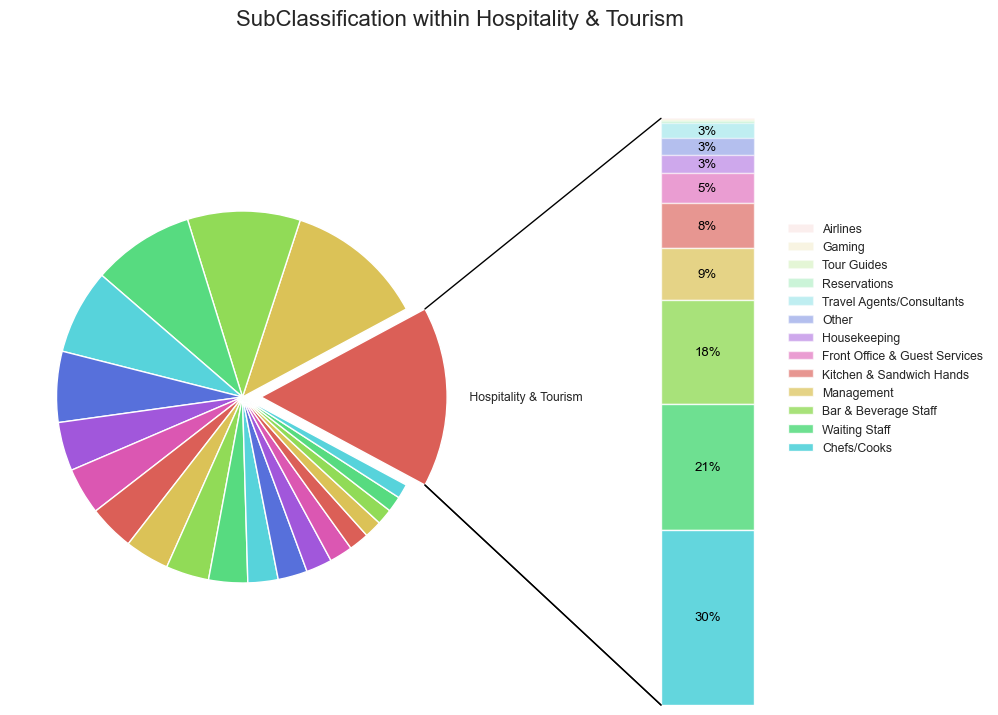

In [705]:
plot_bar_of_pie(df, 'ClassificationLumped', 'Hospitality & Tourism', 'SubClassification', 'hls')

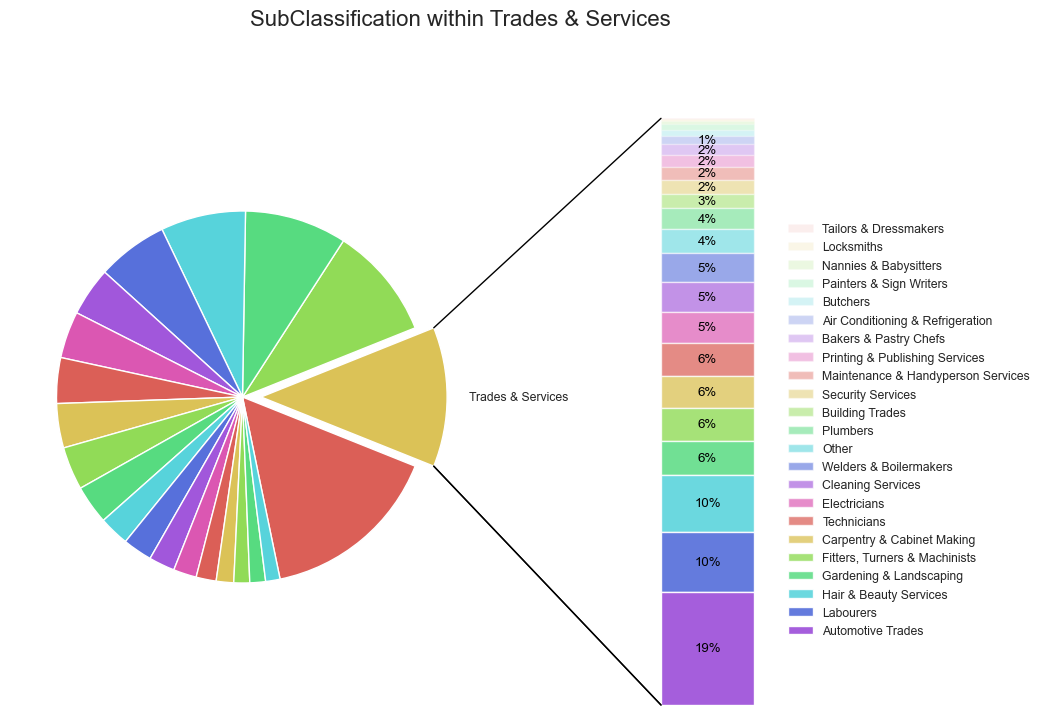

In [706]:
plot_bar_of_pie(df, 'ClassificationLumped', 'Trades & Services', 'SubClassification', 'hls')

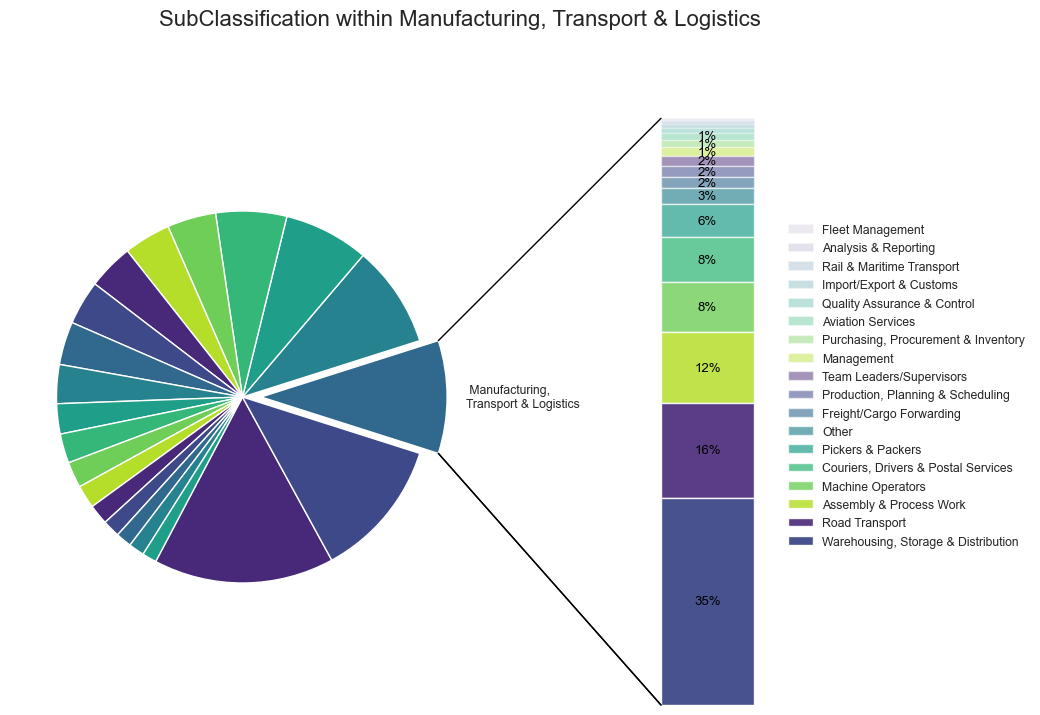

In [707]:
plot_bar_of_pie(df, 'ClassificationLumped', 'Manufacturing, Transport & Logistics', 'SubClassification', 'viridis')

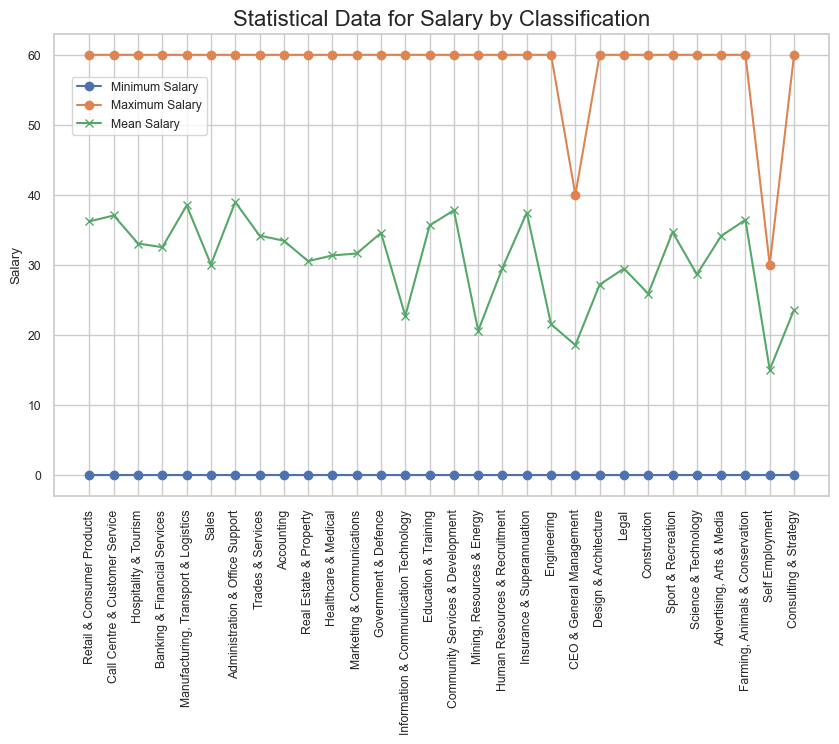

In [708]:
# Statistical Data for Salary by Classification
# Create a new column called 'Salary' which is the average of the lowest and highest salary
df['Salary'] = (df['LowestSalary'] + df['HighestSalary']) / 2

# Create empty lists to store the statistical values
classifications = []
min_salaries = []
max_salaries = []
mean_salaries = []

# Find lowest salary, highest salary and mean salary for each classification
for classification in df['Classification'].unique():
    # Filter the dataframe for the current classification
    subset = df[df['Classification'] == classification]
    
    # Calculate statistical data for the salary column
    salary_stats = subset['Salary'].describe()
    lowest_salary_stats = subset['LowestSalary'].describe()
    highest_salary_stats = subset['HighestSalary'].describe()
    
    # Extract the statistical values
    salary_range = [lowest_salary_stats['min'], highest_salary_stats['max']]
    salary_mean = salary_stats['mean']
    
    # Store the statistical values in the lists
    classifications.append(classification)
    min_salaries.append(salary_range[0])
    max_salaries.append(salary_range[1])
    mean_salaries.append(salary_mean)
    
# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(classifications, min_salaries, marker='o', label='Minimum Salary')
plt.plot(classifications, max_salaries, marker='o', label='Maximum Salary')
plt.plot(classifications, mean_salaries, marker='x', label='Mean Salary')
plt.ylabel('Salary')
plt.title('Statistical Data for Salary by Classification', fontsize=16)
plt.legend()
#shift the legend down a bit
plt.legend(bbox_to_anchor=(0.015, 0.92), loc='upper left', frameon=True)
plt.xticks(rotation=90)
plt.show()






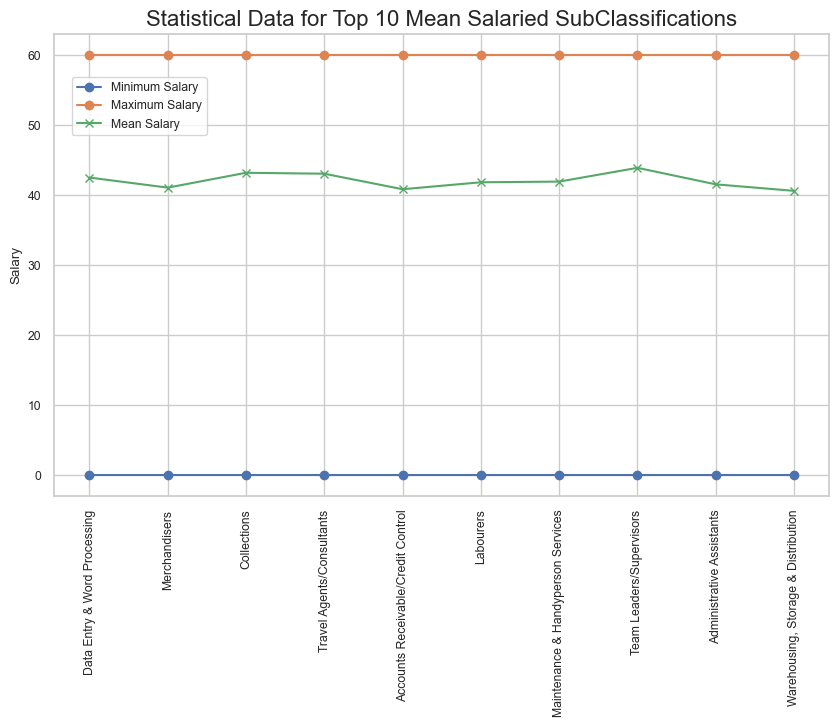

In [709]:
# Statistical Data for Top Salaries by SubClassification
# Calculate the number of entries for each subclassification
subclass_entry_counts = df['SubClassification'].value_counts()

# Filter the subclassifications with at least 10 entries
valid_subclassifications = subclass_entry_counts[subclass_entry_counts >= 10].index

# Calculate the mean salary for each valid subclassification
subclass_mean_salaries = df[df['SubClassification'].isin(valid_subclassifications)].groupby('SubClassification')['Salary'].mean()

# Sort the mean salaries in descending order and select the top 10
top_10_subclassifications = subclass_mean_salaries.nlargest(10).sort_values(ascending=False)

# # Filter the dataframe to include only the top 10 subclassifications
subset_df = df[df['SubClassification'].isin(top_10_subclassifications.index)]

# Create empty lists to store the statistical values
classification = []
min_salaries = []
max_salaries = []
mean_salaries = []

# Iterate over each subclassification
for subclassification in subset_df['SubClassification'].unique():
    # Filter the dataframe for the current subclassification
    subset = subset_df[subset_df['SubClassification'] == subclassification]
    # print("Number of Entries:", len(subset))

    # Calculate statistical data for the salary column
    salary_stats = subset['Salary'].describe()
    lowest_salary_stats = subset['LowestSalary'].describe()
    highest_salary_stats = subset['HighestSalary'].describe()
    
    # Extract the statistical values
    salary_range = [lowest_salary_stats['min'], highest_salary_stats['max']]
    salary_mean = salary_stats['mean']
    
    # Store the statistical values in the lists
    classification.append(subclassification)
    min_salaries.append(salary_range[0])
    max_salaries.append(salary_range[1])
    mean_salaries.append(salary_mean)

# Reverse the order of the lists
classification = classification[::-1]
min_salaries = min_salaries[::-1]
max_salaries = max_salaries[::-1]
mean_salaries = mean_salaries[::-1]

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(classification, min_salaries, marker='o', label='Minimum Salary')
plt.plot(classification, max_salaries, marker='o', label='Maximum Salary')
plt.plot(classification, mean_salaries, marker='x', label='Mean Salary')
plt.ylabel('Salary')
plt.title('Statistical Data for Top 10 Mean Salaried SubClassifications', fontsize=16)
plt.legend()
#shift the legend down a bit
plt.legend(bbox_to_anchor=(0.015, 0.92), loc='upper left', frameon=True)
plt.xticks(rotation=90)
plt.show()

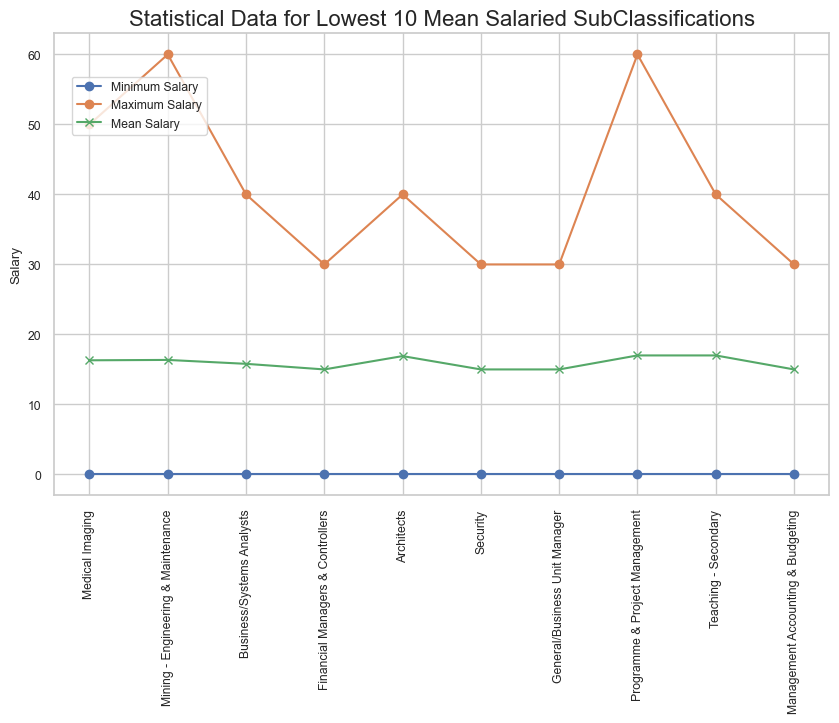

In [710]:
# Statistical Data for Lowest Salaries by SubClassification
# Calculate the number of entries for each subclassification
subclass_entry_counts = df['SubClassification'].value_counts()

# Filter the subclassifications with at least 10 entries
valid_subclassifications = subclass_entry_counts[subclass_entry_counts >= 10].index

# Calculate the mean salary for each valid subclassification
subclass_mean_salaries = df[df['SubClassification'].isin(valid_subclassifications)].groupby('SubClassification')['Salary'].mean()

# Sort the mean salaries in descending order and select the top 10
top_10_subclassifications = subclass_mean_salaries.nsmallest(10).sort_values(ascending=False)

# # Filter the dataframe to include only the top 10 subclassifications
subset_df = df[df['SubClassification'].isin(top_10_subclassifications.index)]

# Create empty lists to store the statistical values
classification = []
min_salaries = []
max_salaries = []
mean_salaries = []

# Iterate over each subclassification
for subclassification in subset_df['SubClassification'].unique():
    # Filter the dataframe for the current subclassification
    subset = subset_df[subset_df['SubClassification'] == subclassification]
    # print("Number of Entries:", len(subset))

    # Calculate statistical data for the salary column
    salary_stats = subset['Salary'].describe()
    lowest_salary_stats = subset['LowestSalary'].describe()
    highest_salary_stats = subset['HighestSalary'].describe()
    
    # Extract the statistical values
    salary_range = [lowest_salary_stats['min'], highest_salary_stats['max']]
    salary_mean = salary_stats['mean']
    
    # Store the statistical values in the lists
    classification.append(subclassification)
    min_salaries.append(salary_range[0])
    max_salaries.append(salary_range[1])
    mean_salaries.append(salary_mean)

# Reverse the order of the lists
classification = classification[::-1]
min_salaries = min_salaries[::-1]
max_salaries = max_salaries[::-1]
mean_salaries = mean_salaries[::-1]

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(classification, min_salaries, marker='o', label='Minimum Salary')
plt.plot(classification, max_salaries, marker='o', label='Maximum Salary')
plt.plot(classification, mean_salaries, marker='x', label='Mean Salary')
plt.ylabel('Salary')
plt.title('Statistical Data for Lowest 10 Mean Salaried SubClassifications', fontsize=16)
plt.legend()
#shift the legend down a bit
plt.legend(bbox_to_anchor=(0.015, 0.92), loc='upper left', frameon=True)
plt.xticks(rotation=90)
plt.show()


# Market by Locations

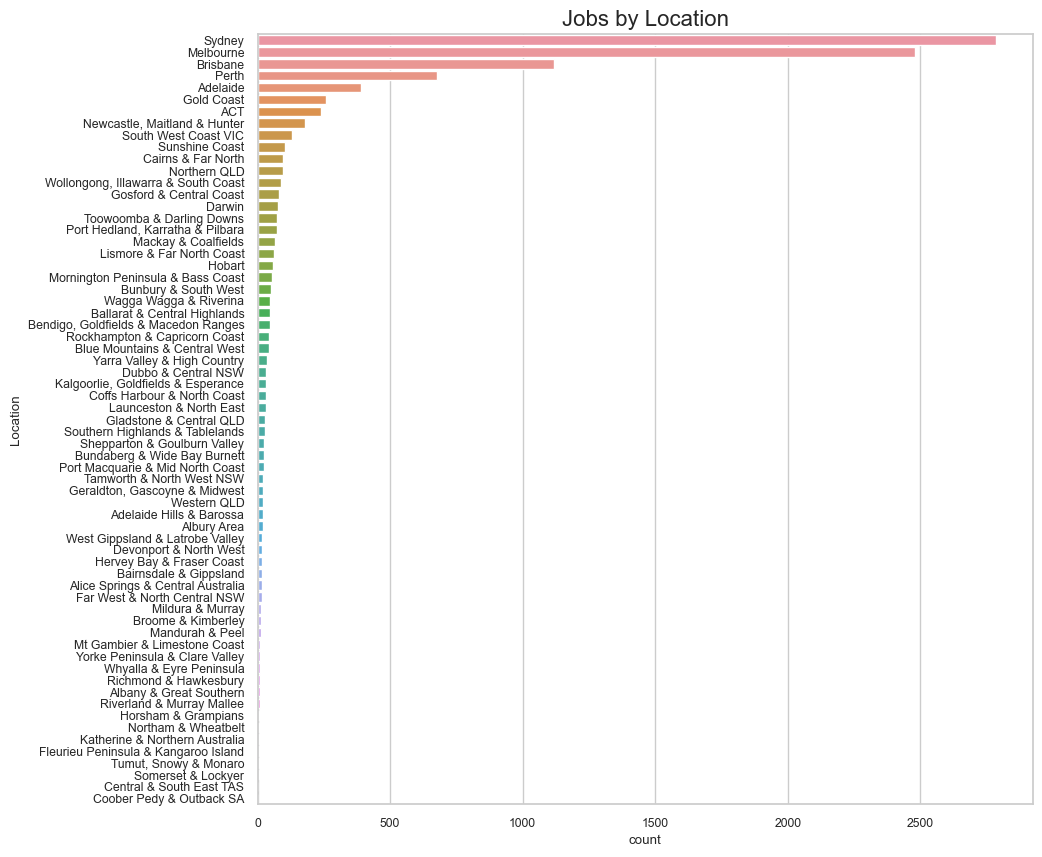

In [711]:
#plot and display a seaborn chart for location column
plt.figure(figsize=(10,10))
sns.countplot(y='Location', data=df, order=df['Location'].value_counts().index)
plt.title("Jobs by Location", fontsize=16)
plt.show()
sns.set(font_scale=0.8)


<Figure size 1200x1000 with 0 Axes>

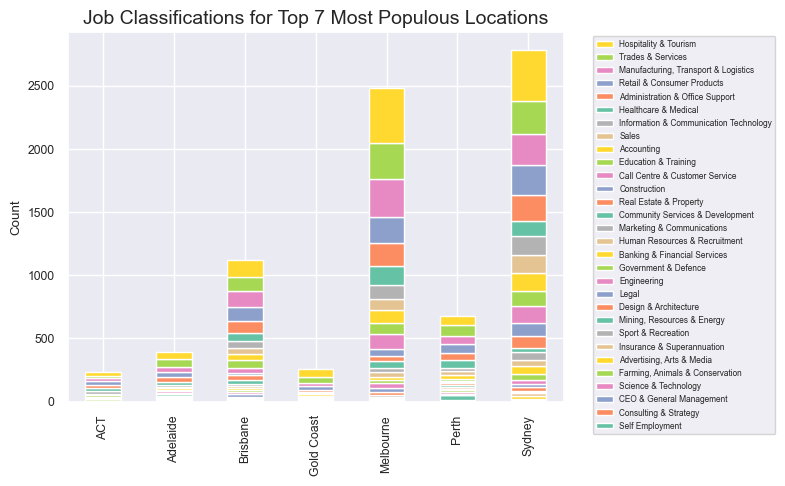

In [712]:
# Get the top 7 most populous locations
top_7_locations = df['Location'].value_counts().nlargest(7).index

# Filter the DataFrame for the top 7 locations
df_top_locations = df[df['Location'].isin(top_7_locations)]

# Group the data by location and classification and sum the counts
grouped_data = df_top_locations.groupby(['Location', 'Classification']).size().reset_index(name='Count').groupby(['Location', 'Classification']).sum().reset_index()

# Pivot the data to create a table with locations as rows, classifications as columns, and count as values
pivoted_data = grouped_data.pivot(index='Location', columns='Classification', values='Count').fillna(0)

# Sort the columns based on their sum (largest to smallest)
pivoted_data = pivoted_data[pivoted_data.sum().sort_values(ascending=True).index]

# Define a custom color palette with distinct colors for each classification
n_colors = len(pivoted_data.columns)
color_palette = sns.color_palette('Set2', n_colors=n_colors)

# Plot the stacked bar plot with the custom color palette
plt.figure(figsize=(12, 10))
pivoted_data.plot(kind='bar', stacked=True, color=color_palette)
plt.title('Job Classifications for Top 7 Most Populous Locations', fontsize=14)
plt.xlabel('')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)

# Reverse the order of the legend labels
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(reversed(handles), reversed(labels), bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True, prop={'size': 6})

plt.show()


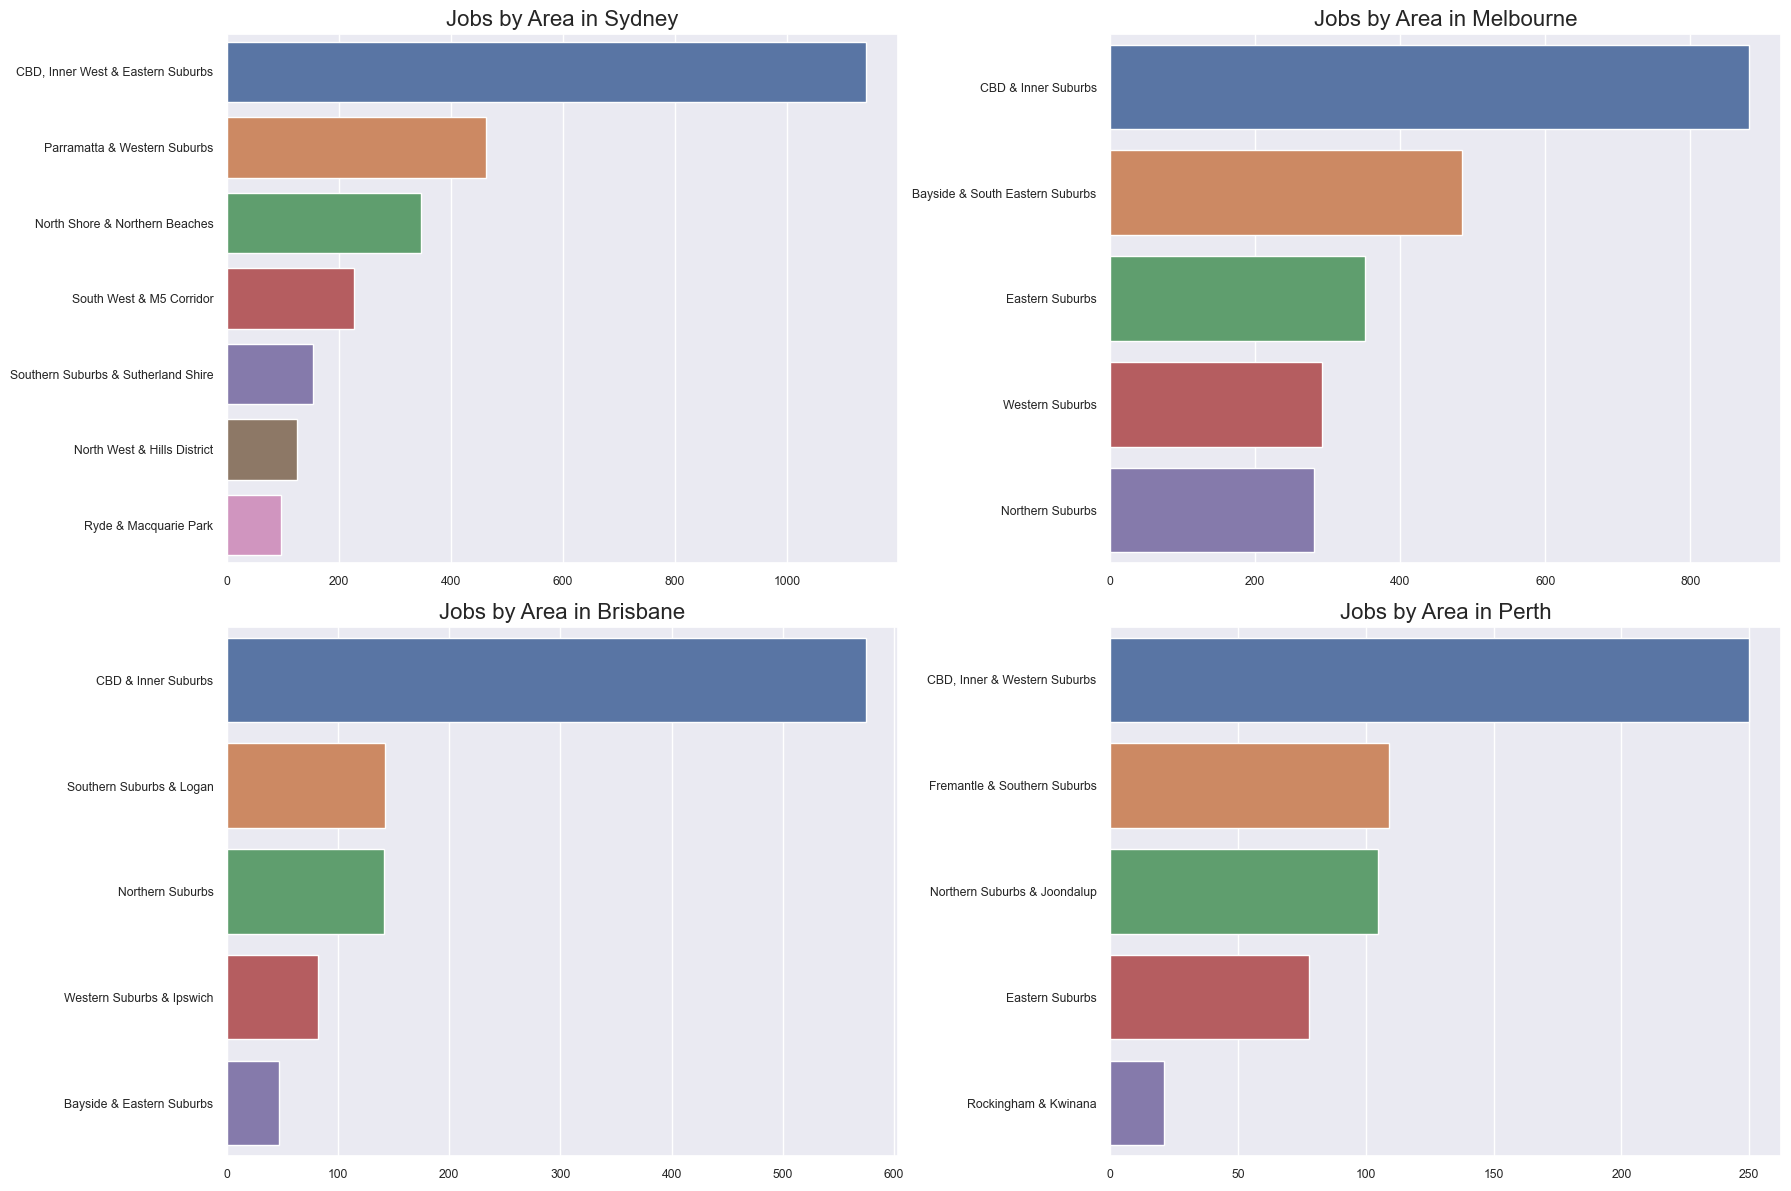

['Sydney', 'Melbourne', 'Brisbane', 'Perth']

In [713]:
# Create a list of the 9 locations
top_4_locations = df['Location'].value_counts().nlargest(4).index
locations = top_4_locations.to_list()
# Create a figure and axes for the subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Iterate over the locations and plot the countplot in each subplot
for i, location in enumerate(locations):
    # Calculate the subplot position
    row = i // 2
    col = i % 2
    
    # Select the data for the specific location
    data = df[df['Location'] == location]
    
    # Plot the countplot in the corresponding subplot
    sns.countplot(y='Area', data=data, order=data['Area'].value_counts().index, ax=axes[row, col])
    axes[row, col].set_title("Jobs by Area in {}".format(location), fontsize=16)
    axes[row, col].set_ylabel('')
    axes[row, col].set_xlabel('')

# Adjust the spacing between subplots
fig.tight_layout()

# Display the figure
plt.show()
locations

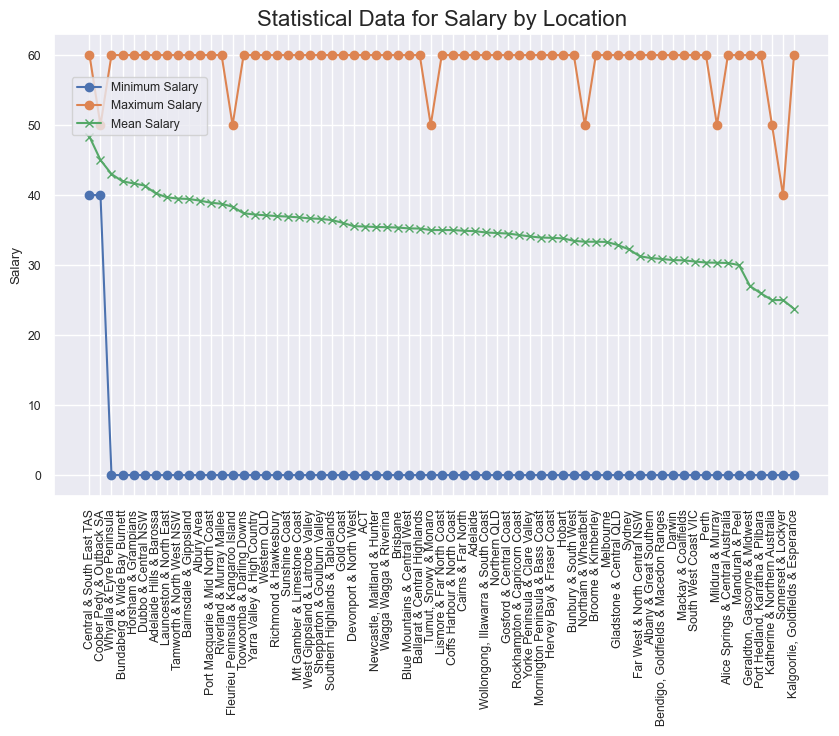

In [714]:
# Calculate the mean salary for each location
location_mean_salaries = df.groupby('Location')['Salary'].mean()

# Sort the locations based on their mean salary in descending order
sorted_locations = location_mean_salaries.sort_values(ascending=False)

# Create empty lists to store the statistical values
locations = []
min_salaries = []
max_salaries = []
mean_salaries = []

# Iterate over each location in sorted order
for location in sorted_locations.index:
    # Filter the dataframe for the current location
    subset = df[df['Location'] == location]
    
    # Calculate statistical data for the salary column
    salary_stats = subset['Salary'].describe()
    lowest_salary_stats = subset['LowestSalary'].describe()
    highest_salary_stats = subset['HighestSalary'].describe()
    
    # Extract the statistical values
    salary_range = [lowest_salary_stats['min'], highest_salary_stats['max']]
    salary_mean = salary_stats['mean']
    
    # Store the statistical values in the lists
    locations.append(location)
    min_salaries.append(salary_range[0])
    max_salaries.append(salary_range[1])
    mean_salaries.append(salary_mean)
    
# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(locations, min_salaries, marker='o', label='Minimum Salary')
plt.plot(locations, max_salaries, marker='o', label='Maximum Salary')
plt.plot(locations, mean_salaries, marker='x', label='Mean Salary')
plt.ylabel('Salary')
plt.title('Statistical Data for Salary by Location', fontsize=16)
plt.legend()
# Shift the legend down a bit
plt.legend(bbox_to_anchor=(0.015, 0.92), loc='upper left', frameon=True)
plt.xticks(rotation=90)
plt.show()


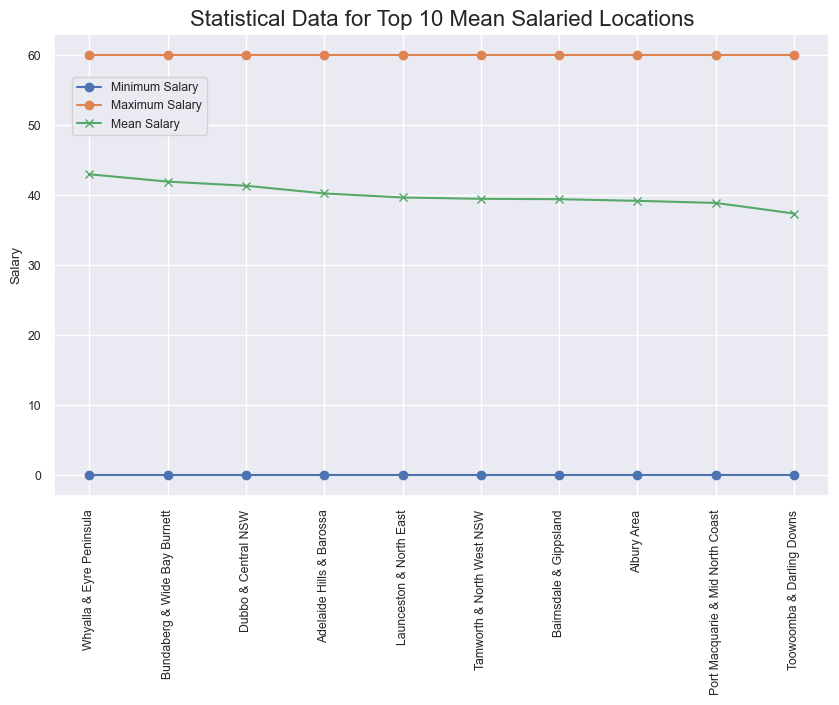

In [715]:
import matplotlib.pyplot as plt

# Calculate the mean salary for each location
location_mean_salaries = df.groupby('Location')['Salary'].mean()

# Calculate the number of entries for each location
location_entry_counts = df['Location'].value_counts()

# Filter the locations with at least 10 entries
valid_locations = location_entry_counts[location_entry_counts >= 10].index

# Calculate the mean salary for each valid location
location_mean_salaries = df[df['Location'].isin(valid_locations)].groupby('Location')['Salary'].mean()

# Sort the mean salaries in descending order and select the top 10
top_10_locations = location_mean_salaries.nlargest(10).sort_values(ascending=False)

# Filter the dataframe to include only the top 10 locations
subset_df = df[df['Location'].isin(top_10_locations.index)]

# Create empty lists to store the statistical values
locations = []
min_salaries = []
max_salaries = []
mean_salaries = []

# Iterate over each location
for location in top_10_locations.index:
    # Filter the dataframe for the current location
    subset = subset_df[subset_df['Location'] == location]

    # Calculate statistical data for the salary column
    salary_stats = subset['Salary'].describe()
    lowest_salary_stats = subset['LowestSalary'].describe()
    highest_salary_stats = subset['HighestSalary'].describe()

    # Extract the statistical values
    salary_range = [lowest_salary_stats['min'], highest_salary_stats['max']]
    salary_mean = salary_stats['mean']

    # Store the statistical values in the lists
    locations.append(location)
    min_salaries.append(salary_range[0])
    max_salaries.append(salary_range[1])
    mean_salaries.append(salary_mean)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(locations, min_salaries, marker='o', label='Minimum Salary')
plt.plot(locations, max_salaries, marker='o', label='Maximum Salary')
plt.plot(locations, mean_salaries, marker='x', label='Mean Salary')
plt.ylabel('Salary')
plt.title('Statistical Data for Top 10 Mean Salaried Locations', fontsize=16)
plt.legend()
# Shift the legend down a bit
plt.legend(bbox_to_anchor=(0.015, 0.92), loc='upper left', frameon=True)
plt.xticks(rotation=90)
plt.show()


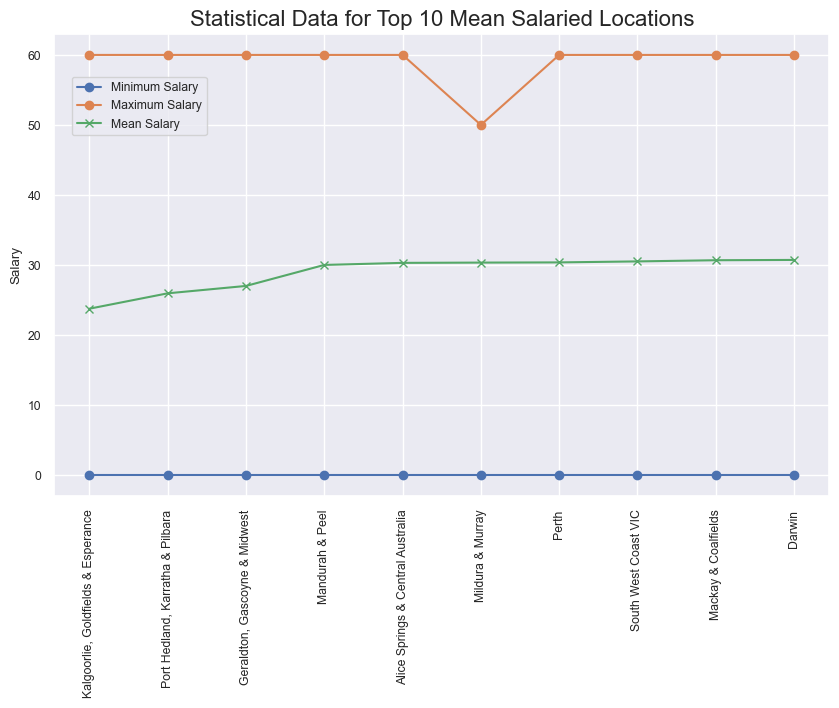

In [716]:
import matplotlib.pyplot as plt

# Calculate the mean salary for each location
location_mean_salaries = df.groupby('Location')['Salary'].mean()

# Calculate the number of entries for each location
location_entry_counts = df['Location'].value_counts()

# Filter the locations with at least 10 entries
valid_locations = location_entry_counts[location_entry_counts >= 10].index

# Calculate the mean salary for each valid location
location_mean_salaries = df[df['Location'].isin(valid_locations)].groupby('Location')['Salary'].mean()

# Sort the mean salaries in descending order and select the top 10
top_10_locations = location_mean_salaries.nsmallest(10).sort_values(ascending=True)

# Filter the dataframe to include only the top 10 locations
subset_df = df[df['Location'].isin(top_10_locations.index)]

# Create empty lists to store the statistical values
locations = []
min_salaries = []
max_salaries = []
mean_salaries = []

# Iterate over each location
for location in top_10_locations.index:
    # Filter the dataframe for the current location
    subset = subset_df[subset_df['Location'] == location]

    # Calculate statistical data for the salary column
    salary_stats = subset['Salary'].describe()
    lowest_salary_stats = subset['LowestSalary'].describe()
    highest_salary_stats = subset['HighestSalary'].describe()

    # Extract the statistical values
    salary_range = [lowest_salary_stats['min'], highest_salary_stats['max']]
    salary_mean = salary_stats['mean']

    # Store the statistical values in the lists
    locations.append(location)
    min_salaries.append(salary_range[0])
    max_salaries.append(salary_range[1])
    mean_salaries.append(salary_mean)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(locations, min_salaries, marker='o', label='Minimum Salary')
plt.plot(locations, max_salaries, marker='o', label='Maximum Salary')
plt.plot(locations, mean_salaries, marker='x', label='Mean Salary')
plt.ylabel('Salary')
plt.title('Statistical Data for Top 10 Mean Salaried Locations', fontsize=16)
plt.legend()
# Shift the legend down a bit
plt.legend(bbox_to_anchor=(0.015, 0.92), loc='upper left', frameon=True)
plt.xticks(rotation=90)
plt.show()

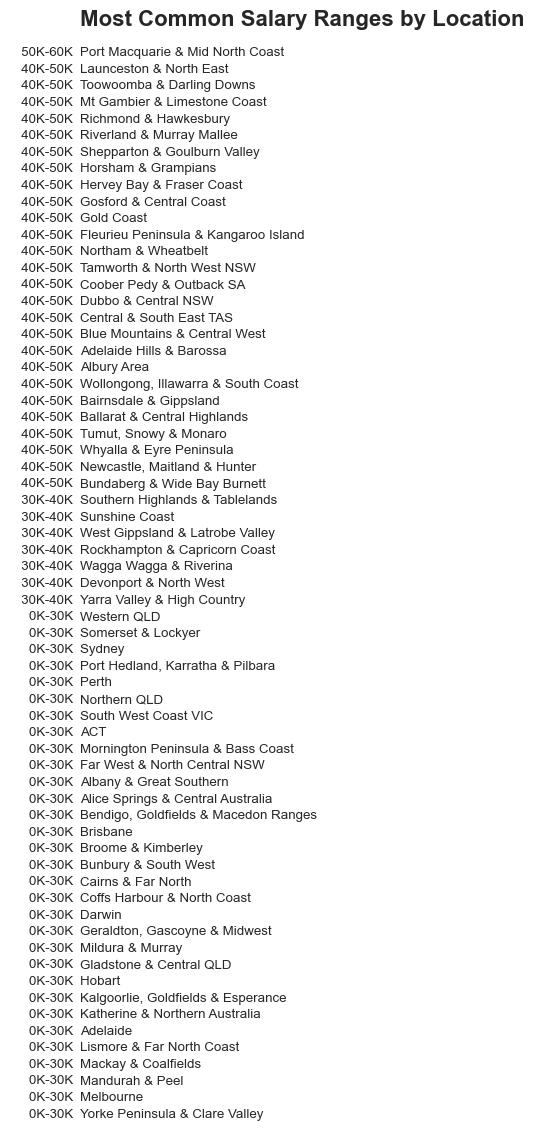

In [717]:
def normalize_range(range_str):
    # Split the range string by the hyphen
    low, high = range_str.split('-')
    
    # Convert the low and high values to integers
    low = int(float(low))
    high = int(float(high))
    
    # Normalize the range values
    low_normalized = str(low) + 'K'
    high_normalized = str(high) + 'K'
    
    # Return the normalized range string
    return low_normalized + '-' + high_normalized

# Find the most common salary range in each location
# make new column of LowestSalary and HighestSalary pair
df['SalaryRange'] = df['LowestSalary'].astype(str) + '-' + df['HighestSalary'].astype(str)
# Find the most common salary range in each location
most_common_salary_ranges = df.groupby('Location')['SalaryRange'].agg(lambda x: x.value_counts().index[0])
# Sort the list in descending order by salary range string
most_common_salary_ranges = most_common_salary_ranges.sort_values(ascending=False)
# Normalize the salary ranges
norm_most_common_salary_ranges = cp.deepcopy(most_common_salary_ranges)
norm_most_common_salary_ranges = norm_most_common_salary_ranges.apply(normalize_range)


# Create a figure and axes
fig, ax = plt.subplots(figsize=(6, 4))

# Set the x and y limits of the axes
ax.set_xlim(0, 1)
ax.set_ylim(0, len(norm_most_common_salary_ranges))
ax.set_facecolor('white')
line_spacing = 3.5

# Invert the order of the salary ranges
norm_most_common_salary_ranges = norm_most_common_salary_ranges[::-1]


# Iterate over the salary ranges and display each item with the location name
for i, (location, salary_range) in enumerate(norm_most_common_salary_ranges.iteritems()):
    if i == len(norm_most_common_salary_ranges) - 1:
        # Heading above final item
        ax.text(0, i*line_spacing +7, 'Most Common Salary Ranges by Location', ha='left', va='center', fontweight='bold', fontsize=16)
    ax.text(0, i*line_spacing, f'{location:<60}', ha='left', va='center')
    ax.text(0, i*line_spacing, f'{salary_range:>10}  ', ha='right', va='center')

# Remove the axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])

# Show the plot
plt.show()

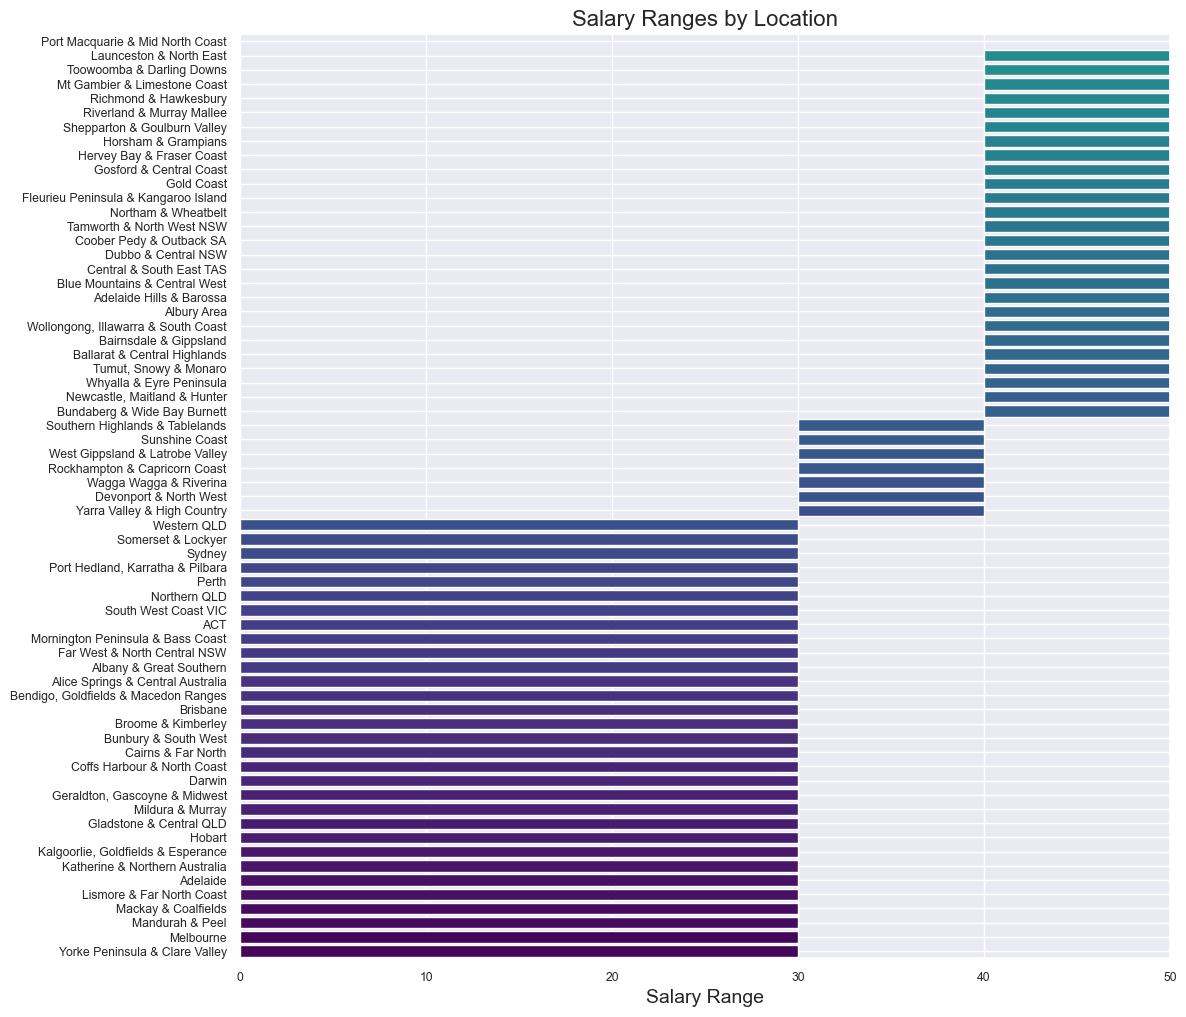

In [721]:
# Plot and visualise most common salary ranges by location

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 12))
palette = sns.color_palette('viridis', len(locations))

# Extract the location names and salary ranges
locations = most_common_salary_ranges.index
salary_ranges = most_common_salary_ranges.values

# Plot the horizontal bar chart
for i, (location, salary_range) in enumerate(zip(locations, salary_ranges)):
    low, high = map(float, salary_range.split('-'))
    ax.barh(location, high - low, left=low, color=palette[i//2])

# Set the y-axis labels to location names
ax.set_yticks(range(len(locations)))
ax.set_yticklabels(locations)

# Set the y-axis limits
ax.set_ylim(-0.5, len(locations) - 0.5)
ax.set_xlim(0, 50)

# Set the x-axis label
ax.set_xlabel('Salary Range', fontsize=14)

# Set the title
ax.set_title('Salary Ranges by Location', fontsize=16)

# Show the plot
plt.show()


# Describe the dataset

* The data.csv dataset contains job market data from various locations within Australia

* Numerical, Categorical, Ordinal, and Discrete data can be seen within the dataset, due to the
    diverse range of classifiers. 13-columns are used to represent a single job, containing key 
    information such as; Company, Location, Description, Salary etc.
    
* The data follows a tabular format, having structured rows and columns with cells that inform
    the relationship between them.
    
* Valuable attributes such as Salary range, Job Classification, and 
    Location will sections of interest for analysis on the dataset.
    
* What parts of the dataset will we use? (Answer once started)

# Data preparation and preprocessing

* To load the data.csv file into the program, we will make use of the Pandas library.
    1) Import the library using "import pandas as pd"
    2) Use the open_csv() pandas function to import the .csv file. "df = pd.read_csv("data.csv")".
        The .csv file object will be assigned to the variable "df"
        
* Data normalization is important as the same data can be represented in varying formats.
    ***EDIT - We will need to normalise dates, and clean NaN cells found in columns of no use (need to expand more)

# Hypothesis


* (Honestly not too sure what to write here at this point in time)
